In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/Users/Smit/Class Work Python/Machine Learing/data/placement.txt")

In [5]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [6]:
print(df.shape)
df.head()

(100, 4)


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


C:\Users\Smit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa', ylabel='iq'>

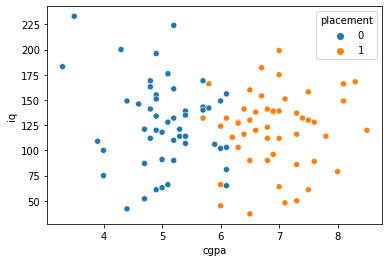

In [10]:
sns.scatterplot(df['cgpa'],df['iq'],hue=df['placement'])

In [17]:
X = df.iloc[:,1:3]
y = df.iloc[:,-1]

In [19]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [20]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [21]:
p.fit(X,y)

Perceptron()

In [22]:
p.coef_

array([[1218.5, -193. ]])

In [23]:
p.intercept_

array([-7.])

In [24]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Smit\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<AxesSubplot:>

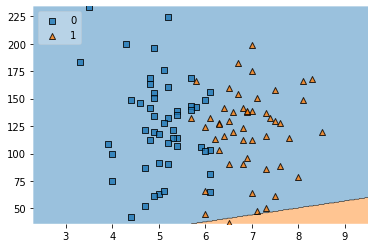

In [30]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)

# Day :4 Perceptron Trick

In [31]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [32]:
import matplotlib.pyplot  as plt

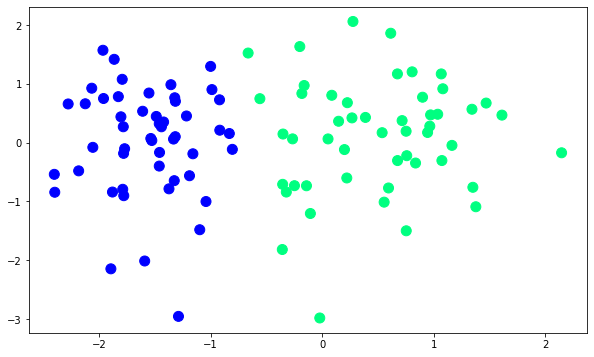

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)

In [37]:
def Perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr=0.1
    
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights =weights + lr * (y[j]-y_hat)*X[j]
        
    
    return weights[0],weights[1:]

In [39]:
def step(z):
    return 1 if z>0 else 0

In [41]:
intercept_,coef_ = Perceptron(X,y)

In [42]:
print(coef_)

[1.37362799 0.07595261]


In [43]:
print(intercept_)

0.9


In [44]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [47]:
x_input = np.linspace(-3,3,100)
y_input = m * X_input + b

(-3.0, 2.0)

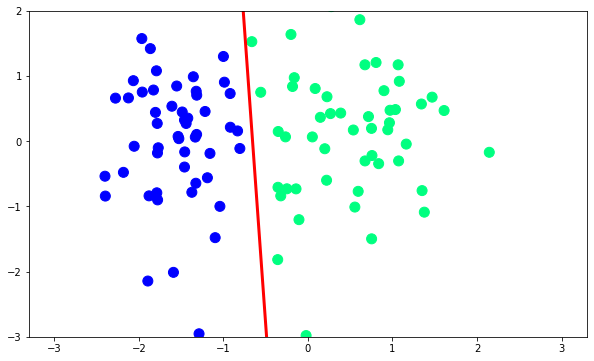

In [48]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

In [2]:
X.shape

(100, 2)

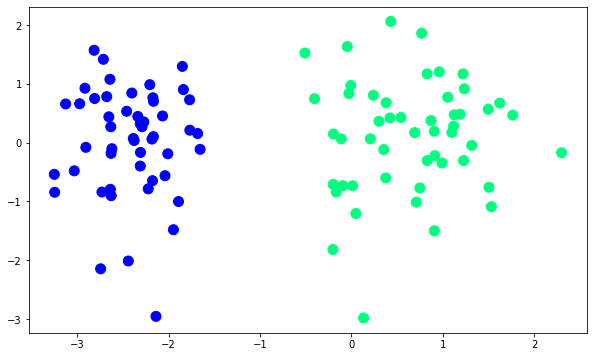

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
def perceptron(X,y):
    
    w1=w2=b=1
    lr = 0.1
    
    for j in range(1000):
    
        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]
            
    return w1,w2,b
            
        

In [5]:
w1,w2,b = perceptron(X,y)

In [6]:
b

1.3000000000000003

In [7]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

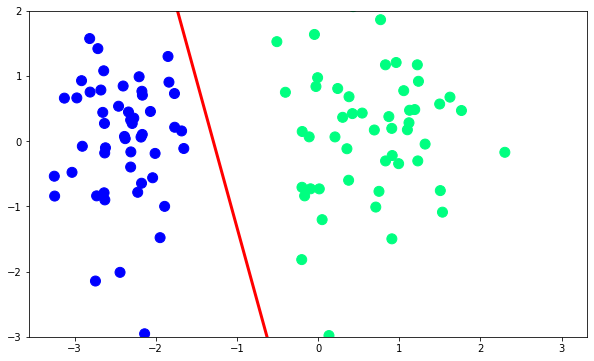

In [8]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)